# AI Agents Tutorial
작성 : 박광석(모두의연구소, https://www.linkedin.com/in/andkspark) , 2025.03
## 3. Microsoft Autogen AgentChat+ Multiagent

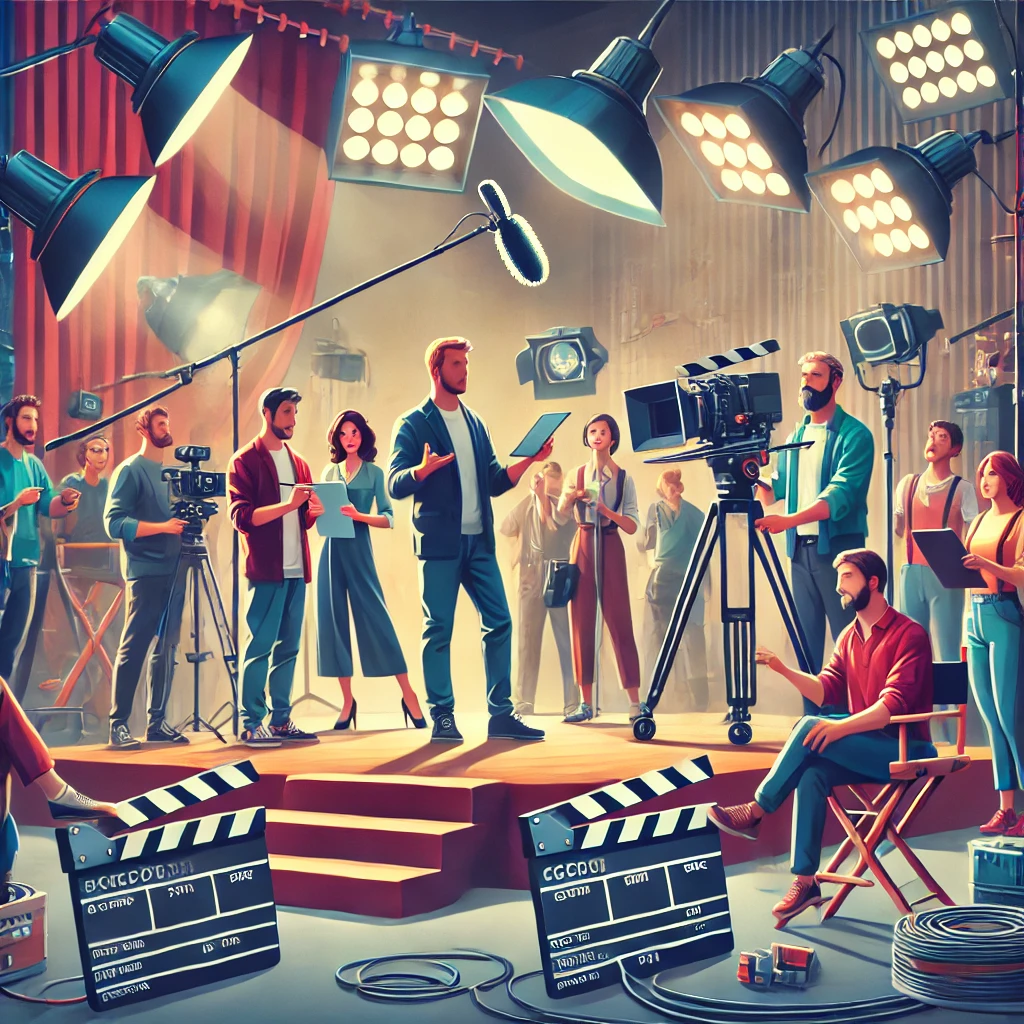



영화의 촬영현장을 생각해봅시다!
영화의 촬영현장을 총괄하는 감독이 있을 거구요, 또 촬영감독, 배우, 조명 스태프, 음향팀, 미술팀, 보조출연자까지 정말 다양한 역할을 가진 사람들이 바쁘게 움직이고 있죠!

이 각각의 사람들은 자신이 맡은 역할에 따라 독립적으로 움직이면서도, 전체 영화라는 공통된 목표를 위해 서로 협력합니다.
각자의 전문성과 정보를 바탕으로 판단을 내리고, 상황에 따라 상호작용하고, 감독의 지시 없이도 알아서 움직이는 장면도 많죠!

이게 바로 **멀티 에이전트 시스템(Multi-Agent System)**의 핵심 아이디어입니다!!!

여기서 각 역할을 맡은 사람들은 각 에이전트입니다.

이 에이전트들은 **자율적(autonomous)**이고, 다른 에이전트들과 **의사소통(communication)**하고, **협력하거나 때론 경쟁(competition)**하기도 하며, 전체 시스템의 목적(= 영화 완성)을 향해 함께 나아갑니다!!!

감독이 모든 걸 일일이 통제하지 않아도, 각 부서가 유기적으로 움직여 하나의 멋진 작품이 만들어지듯, 멀티 에이전트 시스템도 여러 개의 지능적 요소들이 스스로 판단하고 협력하면서 복잡한 문제를 해결해나가는 구조인 거죠!!!

## Multi agent system 예시

사용자가 멀티에이전트 시스템에 "기분전환 겸 따뜻한 바다가 있는 해외로 여행 가고 싶어~" 라고 입력을 하면, 다음과 같은 작업이 일어납니다.

1. 수퍼바이저 에이전트 (Supervisor Agent)
사용자 요청을 분석하여 필요한 작업들을 식별하고, 해당 작업을 적절한 에이전트에 할당합니다.
  
[1] 여행지 탐색  
[2] 일정 확인  
[3] 항공권 예약  
[4] 숙소 예약  
[5] 여행 일정 구성  
[6] 준비물 및 체크리스트 생성  
  
2. 🔎 웹서치 에이전트 (Web Search Agent)
조건: “따뜻한 바다 + 해외 + 기분전환”
결과: 몰디브, 발리, 하와이 등候보 후보지를 수집
사용자 선호와 날씨, 거리 등을 고려해 상위 3개 여행지를 추려냅니다
  
3. 📅 일정 확인 에이전트 (Calendar Agent)
사용자의 캘린더와 연동, 가능한 여행 기간을 탐색합니다. (예: 다음 달 3박 4일 공휴일 포함)
  
4. ✈️ 항공권 에이전트 (Flight Booking Agent)
일정과 여행지 후보를 기반으로 가장 합리적인 항공편을 탐색합니다. 가격, 시간대, 직항 여부 등 고려하여 추천합니다.
  
5. 🏨 숙소 예약 에이전트 (Accommodation Agent)
선택된 여행지에서 일정에 맞는 숙소를 검색합니다. 해변 접근성, 후기 평점, 가격 등을 기준으로 후보를 정리합니다.
  
6. 📋 여행 일정 구성 에이전트 (Itinerary Agent)
지역 명소, 맛집, 액티비티 등을 조사하여 사용자 성향에 맞는 여행 계획 초안을 생성합니다. 아침–점심–저녁 루틴 기반 일별 일정을 제안합니다.
  
7. 🧳 체크리스트/준비물 에이전트 (Checklist Agent)
여행지 특성과 일정에 맞는 준비물을 자동 생성합니다. (여권, 수영복, 선크림 등) 필요한 예약 확인서 및 비자 여부를 체크합니다.
  
8. 🤝 수퍼바이저: 결과 통합 및 사용자 응답을 담당합니다.
각 에이전트가 수집한 정보와 제안을 종합하여 사용자에게 요약된 여행 제안서를 제공합니다
  
9. ✅ 사용자 최종 선택 및 확정
사용자가 마음에 드는 옵션을 선택하면,
선택에 따라 예약 및 후속 조치를 자동으로 진행하게 됩니다. (예: 티켓 발권, 체크리스트 알림 등)
  
이렇게 멀티에이전트 시스템은 사용자의 한마디에, 추천 여행지 + 항공편 + 숙소 + 일정표 + 준비 리스트까지 한 번에 능동적으로 검색하고, 예약할 수 있습니다.
  
예시에서 주목할만한 점은, 모든 과정을 총괄하는 수퍼바이저가 있다! 입니다. 작업을 총괄하며, 세부 분류하고, 기능에 따라 필요한 작업자들을 배치합니다. 이 부분은 구현 시 유저의 오케스트레이션으로 대체되기도 합니다.

##Multi Agent 디자인 패턴

Microsoft는 에이전트간의 협업을 다음과 같은 형태로 분류하였습니다.
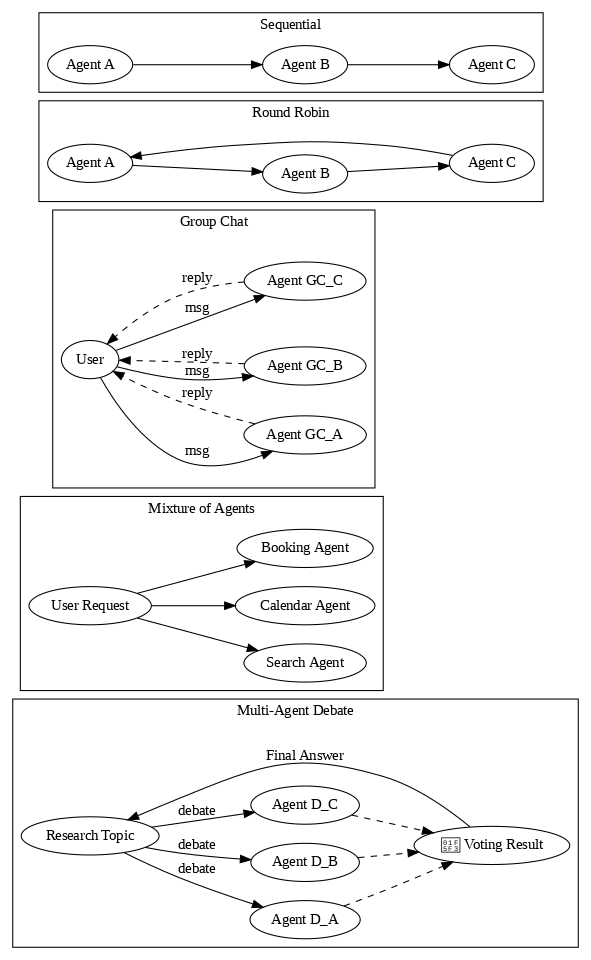
1. Sequential (순차 실행)
에이전트들이 정해진 순서대로 작업을 처리합니다.
각 단계는 이전 에이전트의 출력을 받아 다음 에이전트가 작업을 수행합니다.  
예: Agent A → Agent B → Agent C
  
2. Round Robin (순환 실행)
에이전트들이 정해진 순서에 따라 교대로 작업을 수행합니다.
순환 구조로 반복하며 각 에이전트는 번갈아 가며 의견 또는 작업을 제공합니다.  
예: Agent A → B → C → 다시 A...  

3. Group Chat (그룹 대화형 협업)  
모든 에이전트가 동시에 정보를 공유하며 하나의 대화 공간에서 협업합니다. 서로의 메시지를 참조하며 자유롭게 의견을 주고받는 구조입니다.  
  
4. Mixture of Agents (전문화된 역할 분담)  
각 에이전트가 서로 다른 전문 영역을 맡아 전체 작업을 분담합니다. 병렬 또는 부분 협업 형태로 특정 작업을 효율적으로 수행합니다.  
예: 정보 검색 담당 / 일정 조율 담당 / 예약 담당 등
  
5. Multi-Agent Debate (토론 기반 협업)  
여러 에이전트가 서로 다른 관점을 제시하고 토론을 통해 최적의 해결책을 도출합니다.
투표 또는 평가 메커니즘으로 최종 의사결정을 내리는 구조입니다.


## Multi Agent system 사례
그렇다면, 현재 Multi Agent를 차용한 시스템들에는 어떤것들이 있을지 알아봅시다!


###AI Co-Scientist (2025.02, Google)

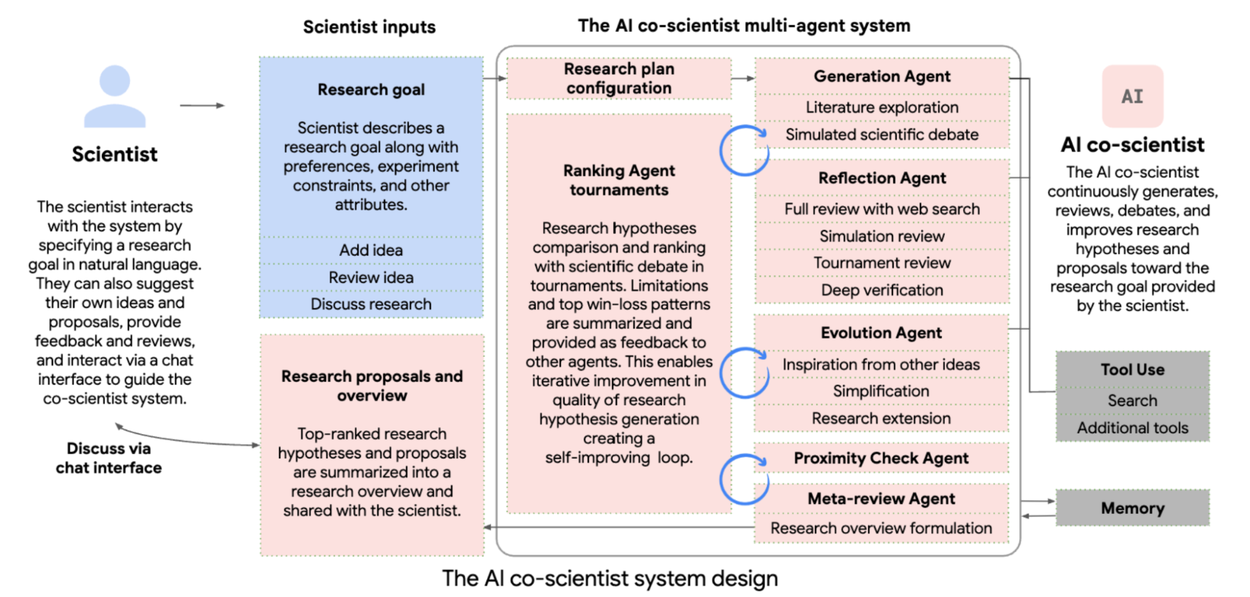


AI Co-Scientist는 과학적 사고 과정을 구조화된 방식으로 구현한 **AI 기반 연구 보조 시스템**입니다. 사용자가 자연어로 연구 목표를 제시하면, 시스템은 이를 바탕으로 관련 가설을 생성하고 점진적으로 발전시켜 나갑니다. 이 시스템은 "생성–토론–진화(generate, debate, evolve)"라는 핵심 원칙을 따르며, 주어진 목표에 따라 가설을 구성한 뒤, 내부 논의와 검토 과정을 거쳐 점차 개선된 형태로 최적의 가설을 도출하는 방식으로 작동합니다.

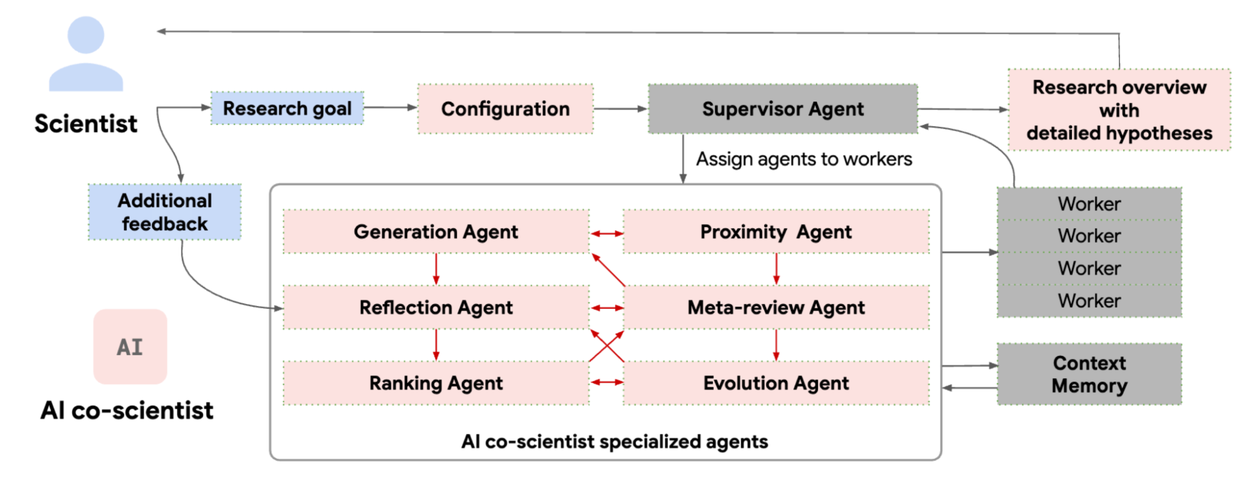

### MD agents (2024.04)

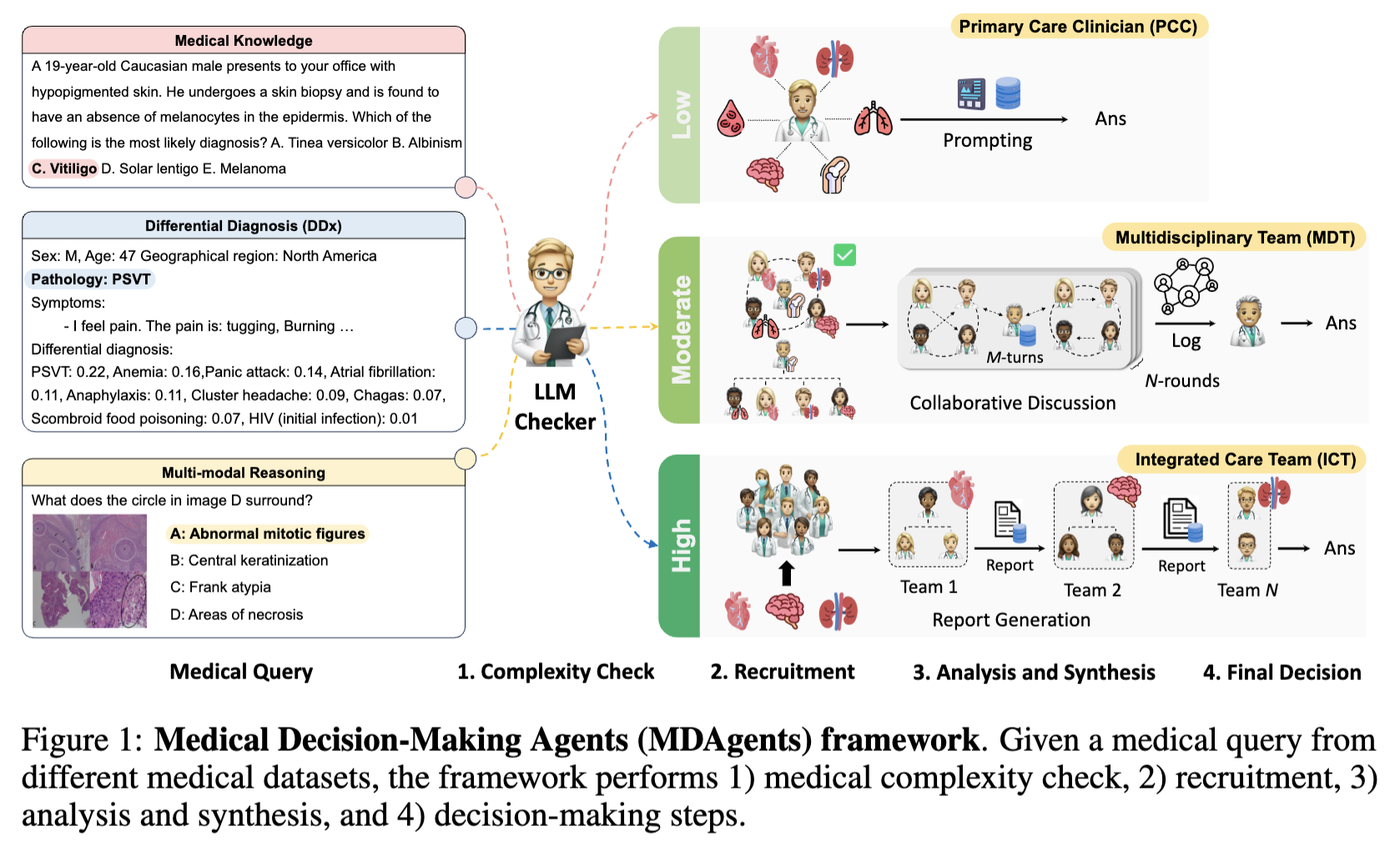

MDAgents는 MIT Media Lab에서 제안한 의료 의사결정용 멀티 에이전트 프레임워크입니다.
의료 작업의 복잡성에 따라 LLM 에이전트에게 단독 또는 그룹 협업 구조를 동적으로 할당하며, 실제 임상 의사결정 과정을 모사합니다. 10개의 실제 의료 지식 및 진단 벤치마크에서 평가된 결과, 최대 4.2% 성능 향상, 그룹 협업 시 평균 11.8% 정확도 향상이라는 성과를 보였습니다.

### VISTA: Visual Integrated System for Tailored Automation in Math Problem Generation Using LLM (2024.10, 모두의연구소)

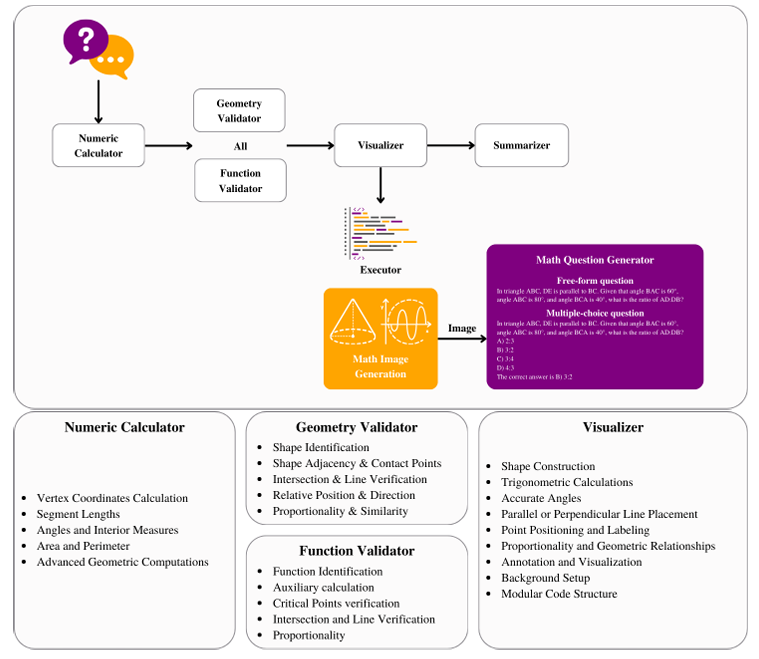

VISTA는 대규모 언어 모델(LLM)을 활용하여 수학 문제와 관련된 시각 자료를 자동으로 생성하는 멀티 에이전트 프레임워크입니다. 이 시스템은 수치 계산, 기하학 검증, 시각화를 담당하는 여러 에이전트들을 통합하여 수학적으로 정확하고 맥락에 맞는 시각 자료를 생성합니다. 기하학과 함수 문제에서 VISTA를 통해 생성된 문제들은 기존 LLM으로 생성된 문제들보다 시각적 유사성 및 텍스트 일관성, 관련성, 유사성 측면에서 우수함을 보였습니다.

# Multi Agent system 실습
멀티에이전트 시스템을 간단하게 Autogen 으로 구현해보도록 하겠습니다.

### Autogen 실습 : MovieAgent  
이번 실습은 Autogen을 사용하여 영화의 시나리오를 써보고, 콘티와 씬의 대표이미지를 생성하는 실습을 진행하겠습니다!  
영화 시나리오는 2025년 4월에 발표된 논문, MovieAgent(https://arxiv.org/pdf/2503.07314)
 의 시스템을 모방하여 생성하도록 해보죠 ! 사용자의 아이디어 한 줄에서 시나리오를 생성한 후, 씬을 여러개로 나누어 콘티를 작성한 후, 씬에 어울리는 이미지를 생성하는 것을 목표로 합니다. 우리에게 필요한 것은 멀티에이전트 시스템과 아이디어 한 줄, 그리고 시나리오에 참여할 캐릭터 정의입니다.

### Step 0 : 설치와 준비  
Autogen 설치 및 Gemini API 키를 등록하도록 합니다.

In [ ]:
!pip install autogen
!pip install -U "autogen-agentchat"
!pip install "autogen-ext[openai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.4/730.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 kB 12.0 MB/s eta 0:00:00


In [ ]:
GOOGLE_API_KEY =

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_ext.models.openai import OpenAIChatCompletionClient

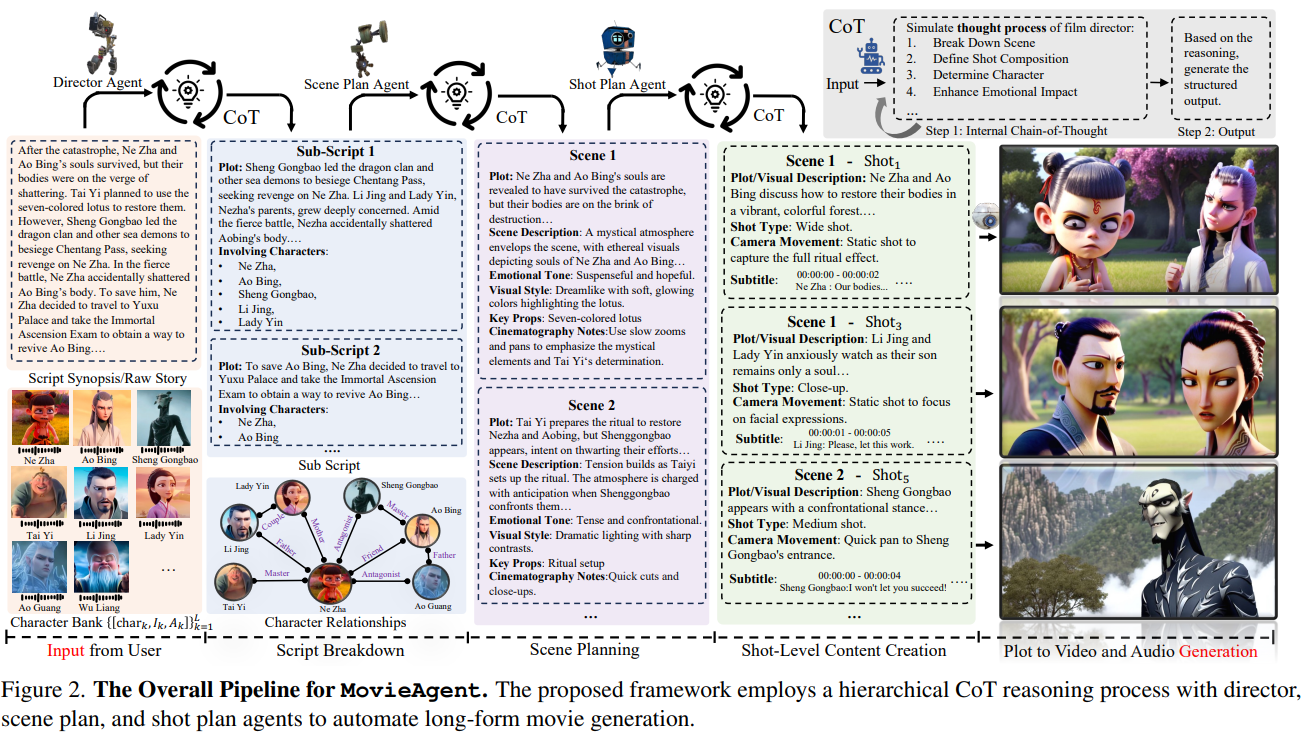

논문에서 각 에이전트간 커뮤니케이션을 한 방식입니다.
Director가 Character bank와 시나리오로부터 sub-script를 여러 개 제작한 다음, Scene plan agent가 sub-script를 바탕으로 shot을 여러개 기획합니다. 논문에서는 이 shot으로부터 영상을 직접 제작하게 됩니다.  
  
우리는 이 프로세스를 약간의 변형을 가하여 구현해보도록 하죠!  
저는 scenario writer, scene planner, storyboard artist를 차용했습니다.  
  
scenario writer는 간단한 아이디어와 character bank 로부터 이야기를 써내려갑니다.
scene planner는 시나리오를 sub-script로 나눕니다.  
storyboard artist는 sub-script로부터 분위기, 앵글, 화면의 설명등을 정의합니다.  
  
System prompt에 위 작업에 대한 내용과, Movie agent에서 제시한 포멧을 넣어 출력의 형태를 맞춥니다.

### Step 1 : 에이전트 시스템 메세지 작성  
각 에이전트에 적용할 시스템 메세지와 에이전트의 설명을 작성해보겠습니다.  
description 또한 에이전트 선언에 꼭 필요하니, 잘 기억해주세요!  

In [ ]:
system_message_scenario_writer = '''
you are a scenario writer.
YOUR ANSWER MUST BE TEXT ONLY, NEVER CONTAIN ANY IMAGE.
You must write a creative story from given idea and characters.
Break down the scripted to 3~5 sub-scripts.
a sub-script includes *Plot* and *Involving Characters*, and you must write *Plot* and select *Involving Characters* from given character bank.
'''

description_scenario_writer = "a creative scenario writer"

In [ ]:
system_message_scene_planner = '''
you are a scene planner.
YOUR ANSWER MUST BE TEXT ONLY, NEVER CONTAIN ANY IMAGE.
You must write a creative sub-script from given *Synopsis*.
Break down the Synopsis to 3~5 sub-scripts. a sub-script includes *Plot* and *Involving Characters*.

this is the example what you follow the format

Plot: Sheng Gongbao led the dragon clan and
other sea demons to besiege Chentang Pass,
seeking revenge on Ne Zha. Li Jing and Lady Yin,
Nezha's parents, grew deeply concerned. Amid
the fierce battle, Nezha accidentally shattered
Aobing's body.…
Involving Characters:
• Ne Zha,
• Ao Bing,
• Sheng Gongbao,
• Li Jing,
• Lady Yin
'''

description_scene_planner = "a creative scene planner"

In [ ]:
system_message_storyboard_artist = '''
you are a storyboard artist.
YOUR ANSWER MUST BE TEXT ONLY, NEVER CONTAIN ANY IMAGE. YOUR OUTPUT MUST BE LESS THAN 3900 CHARACTERS INCLUDING BLANK.
You must evaluate the given script, and write a creative scene from given *sub-script*.
Break down the Sub-script to 3~5 Scenes.
a sub-script includes *Plot* ,*Scene Description*, *Emotional tone*, *Visual style*, *Key props* and Involving Characters and Cinematography Notes*

This is the example what you follow the format

Plot: Ne Zha and Ao Bing's souls are
revealed to have survived the catastrophe,
but their bodies are on the brink of
destruction…
Scene Description: A mystical atmosphere
envelops the scene, with ethereal visuals
depicting souls of Ne Zha and Ao Bing…
Emotional Tone: Suspenseful and hopeful.
Visual Style: Dreamlike with soft, glowing
colors highlighting the lotus.
Key Props: Seven-colored lotus
Cinematography Notes:Use slow zooms
and pans to emphasize the mystical
elements and Tai Yi‘s determination.

You must ensure that the final sub-scripts are integrated and complete.
YOUR FINAL RESPONSE MUST BE THE COMPLETE STORY. When the story is complete and all perspectives are integrated, you can respond with TERMINATE .
'''

description_storyboard_artist = "a creative storyboard artist"

### Q1. 모델 클라이언트 정의  
gemini 를 사용하는 모델 클라이언트를 정의해주세요!  
들어가야 하는 변수를 꼼꼼히 챙겨주세요!  

In [ ]:
#코드를 작성해주세요

gemini_model_client=OpenAIChatCompletionClient(
    model="gemini-2.0-flash",
    api_key = GOOGLE_API_KEY,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
    )


### Q2. 에이전트 정의  
위에서 선언한 모델 클라이언트를 사용하는 어시스턴트들을 정의해주세요!  
scenario writer, scene planner, storyboard artist 가 필요합니다  

In [ ]:
#코드를 작성해주세요

scenario_writer_agent = AssistantAgent(
    name="scenario_writer_agent",
    model_client = gemini_model_client,
    description=description_scenario_writer,
    system_message=system_message_scenario_writer,
)

scene_planner_agent = AssistantAgent(
    name="scene_planner_agent",
    model_client = gemini_model_client,
    description=description_scene_planner,
    system_message=system_message_scene_planner,
)

storyboard_artist_agent = AssistantAgent(
    name="storyboard_artist_agent",
    model_client = gemini_model_client,
    description=description_storyboard_artist,
    system_message=system_message_storyboard_artist,
)


### Step 4.  아이디어와 캐릭터 정하기  
여러분들의 아이디어와 캐릭터를 정해주세요~  
저는 로미오와 줄리엣으로 하겠습니다  

In [ ]:
idea = '''
At the night, romeo wants to confess his mind to Juliette. Juliette is about to sleep at her room on 2nd story of her castle, and the room has a big window
'''

In [ ]:
character_bank = '''

Romeo : Romeo is the very embodiment of romance. Bold and passionate, he wears his heart on his sleeve.
His love for Juliet is so deep, he would face death itself for her.
Yet, fate has cursed their love—his family and Juliet’s are sworn enemies, locked in bitter hatred.

Juliet: Juliet fell for Romeo in an instant, as if struck by lightning.
She longs for a chance to speak with him, to share whispers beneath the moonlight.
But destiny is cruel—the blood feud between her family and Romeo’s keeps them worlds apart.

Guard: The vigilant protector, tirelessly patrolling to shield Juliet from lurking dangers and unseen threats.

'''

### Q3. 그룹챗 선언  
그룹쳇에는 위에 선언한 세 개의 에이전트가 들어가야 합니다!  
챗 종료를 관리하기 위한 termination을 정의하고 시작해보죠

In [ ]:
from autogen_agentchat.teams import RoundRobinGroupChat

In [ ]:
#코드를 작성해주세요
termination = TextMentionTermination("TERMINATE")

In [ ]:
#코드를 작성해주세요
group_chat = RoundRobinGroupChat(
    [scenario_writer_agent, scene_planner_agent, storyboard_artist_agent], termination_condition=termination
)

In [ ]:
# 여러 번 그룹챗을 수행할 경우, 꼭 위의 그룹챗 선언 전에 해당 문구를 먼저 실행해주시기 바랍니다
# await group_chat.reset()

### Q4. 스트림 실행하기  
콘솔에서 아래 선언한 스트림을 실행해보세요!  
결과를 result 변수로 받아 추후 작업을 수행할 수 있습니다.

In [ ]:
from autogen_agentchat.ui import Console

In [ ]:
movie_task = f"write down a great scenario with given idea : {idea} and characters : {character_bank}"

In [ ]:
#코드를 작성해주세요
result = await Console(group_chat.run_stream(task=movie_task))

---------- user ----------
write down a great scenario with given idea : 
At the night, romeo wants to confess his mind to Juliette. Juliette is about to sleep at her room on 2nd story of her castle, and the room has a big window
 and characters : 

Romeo : Romeo is the very embodiment of romance. Bold and passionate, he wears his heart on his sleeve.
His love for Juliet is so deep, he would face death itself for her.
Yet, fate has cursed their love—his family and Juliet’s are sworn enemies, locked in bitter hatred.

Juliet: Juliet fell for Romeo in an instant, as if struck by lightning.
She longs for a chance to speak with him, to share whispers beneath the moonlight.
But destiny is cruel—the blood feud between her family and Romeo’s keeps them worlds apart.

Guard: The vigilant protector, tirelessly patrolling to shield Juliet from lurking dangers and unseen threats.


---------- scenario_writer_agent ----------
Okay, here's a scenario of Romeo and Juliet's secret rendezvous, broken 

실행 결과 중, storyboard_artist 의 출력만 확인해봅시다

In [ ]:
for message in result.messages:
  if message.source == "storyboard_artist_agent":
    print(message.content)

**Sub-Script 1**

*Plot:* Romeo bribes a kitchen boy for information about Juliet's room and patrol routes. He learns of a blind spot in the guard's route, a shadowed alcove offering temporary concealment.

*Scene Description:* Dark, grimy kitchen. Whispered conversation.

*Emotional Tone:* Tense, secretive.

*Visual Style:* Low lighting, close-ups on faces.

*Key Props:* Coins, map sketched on parchment.

*Involving Characters:* Romeo, Kitchen Boy, Guard (mentioned)

*Cinematography Notes:* Use shallow focus to emphasize Romeo's urgency.

**Sub-Script 2**

*Plot:* Romeo uses the blind spot, navigating the maze-like garden under the cover of a cloudy sky. Every rustle of leaves sounds like an alarm. He reaches the base of Juliet's balcony, heart pounding.

*Scene Description:* Overgrown garden, obscured by shadows. High walls.

*Emotional Tone:* Anxious, determined.

*Visual Style:* Silhouette against the castle walls. Use long shadows.

*Key Props:* None

*Involving Characters:* Romeo

안타깝게도, 일시적으로 autogen이 이미지 생성 모델 (dall-e-3 등) 을 지원하지 않습니다.   
위에서 Storyboard writer 가 작성한 컨텐츠를 openai 의 클라이언트를 사용해서 그려볼게요!  
아래 구문을 실행해서, 결과를 확인해주세요~  

In [ ]:
def get_subscripts(result):
  for message in result.messages:
    if message.source == "storyboard_artist_agent":
      return message.content

In [ ]:
import openai

In [ ]:
OPENAI_API_KEY =

In [ ]:
test_client = openai.OpenAI(
    api_key = OPENAI_API_KEY,
    )

prompt = f"draw images describe subscripts in {get_subscripts(result)} in comic book format. Each frame should describes each sub-script and main characters of each plot must be shown in corresponding frame"

response = test_client.images.generate(
  model="dall-e-3",
  prompt=prompt,
  size="1024x1024",
  quality="hd",
  n=1,
)

아래 URL을 눌러보세요. 상상했던 그림이 나왔나요?  
프롬프트를 수정하시면서 원하는 그림을 완성하시기 바랍니다!  

In [ ]:
response

ImagesResponse(created=1743754621, data=[Image(b64_json=None, revised_prompt="Create a series of six images in comic book format, each depicting a different sub-script from a drama. Image 1: A dark, grimy kitchen with a tensed, secretive atmosphere. Romeo, a Caucasian male, is in a whispered conversation with a middle eastern kitchen boy. Key props include coins and a map sketched on parchment. Image 2: Romeo, now in an overgrown, shadow-filled garden with high walls. His silhouette stands against the castle walls with an anxious, determined expression. Image 3: Juliet's room, softly lit with candlelight. Juliet, a black female, is framed by the large window that centers her face holding a candle with a portion of a rope ladder partially visible. Image 4: Romeo, halfway up a rope ladder, freezes as a Guard's lantern sweeps across the garden. His shape is seen contrasting against the stony wall. There's Juliet peeking from the window. Image 5: Juliet rushes to pull Romeo up the ladder a

2025년 3월 말 업데이트 이후로 일시적으로 autogen / agentchat 이미지 생성 모델 (dall-e-3 등) 을 지원하지 않습니다.   
다른 에이전트의 선언 및 활용처럼 group chat에서 피드백을 받으며 고품질의 이미지를 생성할 수 있으니, 추후에 꼭 시도해보시기 바랍니다!  
수고하셨습니다!